In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180,high=180,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-40.07659208076737, -103.25295564161136),
 (-31.395512458187348, -123.22198758908668),
 (39.10022846865226, 4.421171039491384),
 (-10.546209950187574, -44.32725171517117),
 (-82.84904870191372, 73.49311848766749),
 (45.508954308815134, 122.57893004680307),
 (60.02364259348681, 84.05577792062735),
 (66.62627840784555, -37.50539677836667),
 (-17.089254900003823, 5.185381616512018),
 (-83.816566931912, 52.01131992774893),
 (10.954161033627088, 108.57984640671441),
 (24.38862826002513, -77.2731165399867),
 (-0.5355380400281717, 35.82797164333232),
 (55.26498718611046, 109.00121712709358),
 (75.97088018350922, 120.92186332741198),
 (75.37192828918057, 167.10652187526813),
 (-62.03379066062129, -75.8731260096389),
 (30.663306233268244, -27.398760905800316),
 (-48.73694625390077, -162.26192790689794),
 (-81.34549059745929, -86.80142363359491),
 (59.422735398929376, 90.87495490137644),
 (-48.34593514805684, -56.21000908168159),
 (6.4575599196850675, 117.50260848105984),
 (56.722555529154704,

NOTE
You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

## citipy

https://github.com/wingchen/citipy

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # if the city is unique, the we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# pring the city count to confirm the sufficient count
len(cities)

626

### 6.2.6 get the city weather data

In [7]:
#import the request library
import requests as req

#import the api key
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#import dependencies
from datetime import datetime

In [10]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list
#for i in range (len(cities)):
for i, city in enumerate(cities): 

    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city
    #city_url = url + "&q=" + cities[i]
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the url, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

    
#Run an API request for each of the cities
    try:
        #parse the json and retrieve data
        city_weather = req.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        
        #append the city informatio into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #if an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")
    
    

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | mahon
Processing Record 4 of Set 1 | corrente
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | baicheng
Processing Record 7 of Set 1 | belyy yar
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | phan thiet
Processing Record 12 of Set 1 | andros town
Processing Record 13 of Set 1 | molo
Processing Record 14 of Set 1 | severobaykalsk
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | ponta delgada
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | yeniseysk
Processing Record 22 of Set 1 | necochea
Processing Record 23 

Processing Record 37 of Set 3 | kyzyl-suu
Processing Record 38 of Set 3 | bredasdorp
Processing Record 39 of Set 3 | gamba
Processing Record 40 of Set 3 | alta floresta
Processing Record 41 of Set 3 | gushikawa
Processing Record 42 of Set 3 | burica
City not found. Skipping...
Processing Record 43 of Set 3 | asfi
Processing Record 44 of Set 3 | beaverlodge
Processing Record 45 of Set 3 | faya
Processing Record 46 of Set 3 | sokoto
Processing Record 47 of Set 3 | emerald
Processing Record 48 of Set 3 | kushiro
Processing Record 49 of Set 3 | ambon
Processing Record 50 of Set 3 | tomatlan
Processing Record 1 of Set 4 | luwuk
Processing Record 2 of Set 4 | ketchikan
Processing Record 3 of Set 4 | navrongo
Processing Record 4 of Set 4 | nanakuli
Processing Record 5 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 4 | lebu
Processing Record 7 of Set 4 | isangel
Processing Record 8 of Set 4 | carnarvon
Processing Record 9 of Set 4 | mandera
Processing 

Processing Record 30 of Set 7 | baykalsk
Processing Record 31 of Set 7 | sao desiderio
Processing Record 32 of Set 7 | quatre cocos
Processing Record 33 of Set 7 | chimichagua
Processing Record 34 of Set 7 | tual
Processing Record 35 of Set 7 | dublin
Processing Record 36 of Set 7 | mecca
Processing Record 37 of Set 7 | havre
Processing Record 38 of Set 7 | bolshiye uki
City not found. Skipping...
Processing Record 39 of Set 7 | santa rosalia
Processing Record 40 of Set 7 | karratha
Processing Record 41 of Set 7 | kazalinsk
City not found. Skipping...
Processing Record 42 of Set 7 | elk river
Processing Record 43 of Set 7 | burnie
Processing Record 44 of Set 7 | carutapera
Processing Record 45 of Set 7 | tessalit
Processing Record 46 of Set 7 | hengshan
Processing Record 47 of Set 7 | rio cuarto
Processing Record 48 of Set 7 | qaqortoq
Processing Record 49 of Set 7 | inndyr
Processing Record 50 of Set 7 | kyren
Processing Record 1 of Set 8 | konstantinovka
Processing Record 2 of Set 8 

Processing Record 15 of Set 11 | solikamsk
Processing Record 16 of Set 11 | yanan
City not found. Skipping...
Processing Record 17 of Set 11 | jardim
Processing Record 18 of Set 11 | hay river
Processing Record 19 of Set 11 | penzance
Processing Record 20 of Set 11 | sahrak
City not found. Skipping...
Processing Record 21 of Set 11 | altay
Processing Record 22 of Set 11 | kirakira
Processing Record 23 of Set 11 | yumen
Processing Record 24 of Set 11 | nisia floresta
Processing Record 25 of Set 11 | tianpeng
Processing Record 26 of Set 11 | avondale
Processing Record 27 of Set 11 | naze
Processing Record 28 of Set 11 | aleksandrov gay
Processing Record 29 of Set 11 | krian
Processing Record 30 of Set 11 | darnah
Processing Record 31 of Set 11 | anamur
Processing Record 32 of Set 11 | kloulklubed
Processing Record 33 of Set 11 | palmer
Processing Record 34 of Set 11 | nouadhibou
Processing Record 35 of Set 11 | samarai
Processing Record 36 of Set 11 | nalut
Processing Record 37 of Set 11

After collecting all our data, we can tally the number of cities in the city_data array of dictionaries using the len() function.

In [11]:
len(city_data)

574

https://docs.python.org/3.6/tutorial/errors.html -try and except blocks

### 6.2.7 create a dataframe of city weather data

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.87,-73.82,59.00,100,90,13.87,CL,20-12-24 08:49:15
1,Rikitea,-23.12,-134.97,77.86,70,46,8.93,PF,20-12-24 08:44:23
2,Mahon,39.89,4.27,57.20,93,20,3.36,ES,20-12-24 08:49:16
3,Corrente,-3.74,-43.34,72.54,98,67,3.09,BR,20-12-24 08:49:17
4,Baicheng,45.62,122.82,13.46,76,100,4.92,CN,20-12-24 08:49:18
5,Belyy Yar,53.60,91.39,23.00,49,0,6.71,RU,20-12-24 08:49:20
6,Tasiilaq,65.61,-37.64,32.00,98,100,33.33,GL,20-12-24 08:45:03
7,Namibe,-15.20,12.15,71.60,83,75,5.82,AO,20-12-24 08:49:22
8,Port Alfred,-33.59,26.89,68.00,93,100,1.99,ZA,20-12-24 08:49:22
9,Phan Thiet,10.93,108.10,81.90,74,17,15.75,VN,20-12-24 08:49:22


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,20-12-24 08:49:15,-41.87,-73.82,59.00,100,90,13.87
1,Rikitea,PF,20-12-24 08:44:23,-23.12,-134.97,77.86,70,46,8.93
2,Mahon,ES,20-12-24 08:49:16,39.89,4.27,57.20,93,20,3.36
3,Corrente,BR,20-12-24 08:49:17,-3.74,-43.34,72.54,98,67,3.09
4,Baicheng,CN,20-12-24 08:49:18,45.62,122.82,13.46,76,100,4.92
5,Belyy Yar,RU,20-12-24 08:49:20,53.60,91.39,23.00,49,0,6.71
6,Tasiilaq,GL,20-12-24 08:45:03,65.61,-37.64,32.00,98,100,33.33
7,Namibe,AO,20-12-24 08:49:22,-15.20,12.15,71.60,83,75,5.82
8,Port Alfred,ZA,20-12-24 08:49:22,-33.59,26.89,68.00,93,100,1.99
9,Phan Thiet,VN,20-12-24 08:49:22,10.93,108.10,81.90,74,17,15.75


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

### 6.3.1 Plot Latitude vs Temperature

In [18]:
#extract relevant fields from the datafram for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

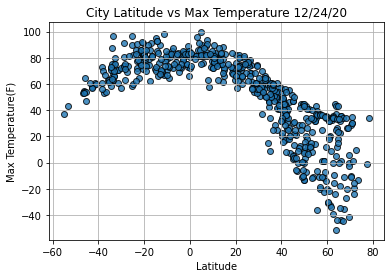

In [20]:
#import time module
import time

#build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="k",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

documentation regarding time:
    https://docs.python.org/3.6/library/time.html#functions

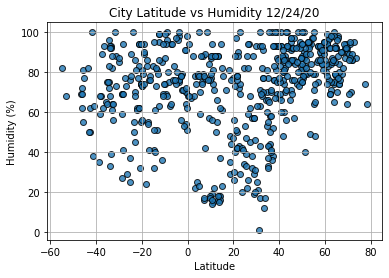

In [22]:
#repurpose code --build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="k",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

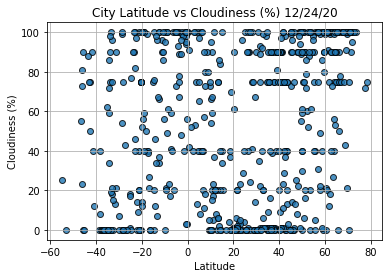

In [23]:
#repurpose code --build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="k",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

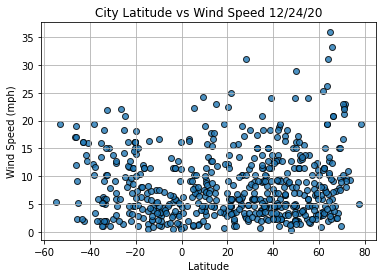

In [26]:
#repurpose code --build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="k",linewidths=1,marker="o",
           alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

## Create a Linear Regression Function

In [75]:
#import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "r")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [76]:
index13 = city_data_df.loc[13]
index13

City                  Saskylakh
Country                      RU
Date          20-12-24 08:49:23
Lat                       71.92
Lng                      114.08
Max Temp                 -19.53
Humidity                     86
Cloudiness                  100
Wind Speed                 8.01
Name: 13, dtype: object

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Mahon,ES,20-12-24 08:49:16,39.89,4.27,57.20,93,20,3.36
4,Baicheng,CN,20-12-24 08:49:18,45.62,122.82,13.46,76,100,4.92
5,Belyy Yar,RU,20-12-24 08:49:20,53.60,91.39,23.00,49,0,6.71
6,Tasiilaq,GL,20-12-24 08:45:03,65.61,-37.64,32.00,98,100,33.33
9,Phan Thiet,VN,20-12-24 08:49:22,10.93,108.10,81.90,74,17,15.75


In [78]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

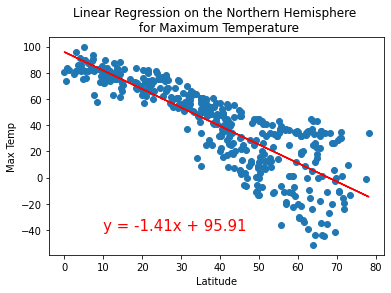

In [90]:
#linear regression on the northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
                       ,'Max Temp',(10,-40))

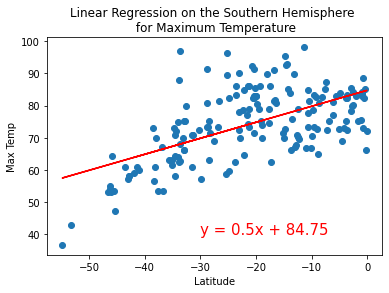

In [91]:
#linear regression on the southern hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
                       ,'Max Temp',(-30,40))

### 6.4.3 Find the Correlation Between Latitude and Percent Humidity

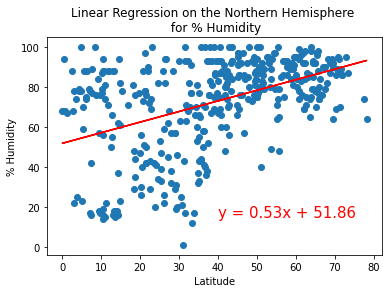

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity'
                       ,'% Humidity',(40,15))

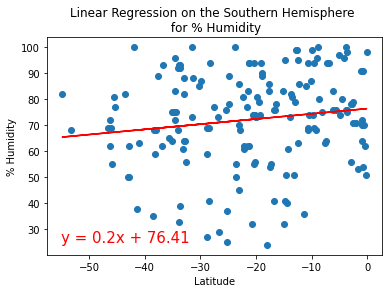

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,25))

### 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

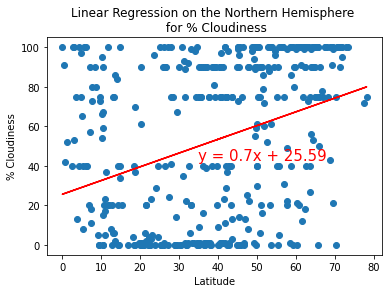

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness'
                       ,'% Cloudiness',(35,43))

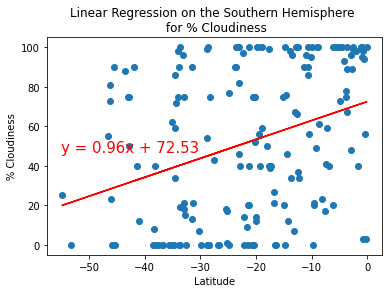

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,47))

### 6.4.5 Find the Correlation Between Latitude and Wind Speed

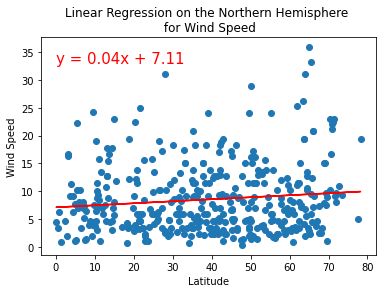

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed'
                       ,'Wind Speed',(0,33))

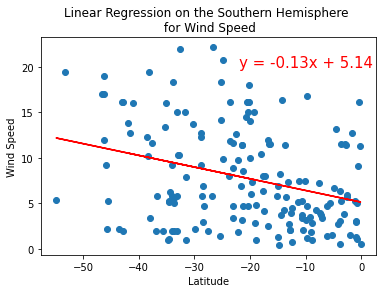

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-22,20))

In [3]:
import gmaps

https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html